## Mountain_car

epoch  100 score  -1000.0 epsilon 0.996
epoch  200 score  -1000.0 epsilon 0.992
epoch  300 score  -1000.0 epsilon 0.988
epoch  400 score  -1000.0 epsilon 0.984
epoch  500 score  -1000.0 epsilon 0.980
epoch  600 score  -1000.0 epsilon 0.976
epoch  700 score  -1000.0 epsilon 0.972
epoch  800 score  -1000.0 epsilon 0.968
epoch  900 score  -1000.0 epsilon 0.964
epoch  1000 score  -1000.0 epsilon 0.960
epoch  1100 score  -1000.0 epsilon 0.956
epoch  1200 score  -1000.0 epsilon 0.952
epoch  1300 score  -1000.0 epsilon 0.948
epoch  1400 score  -1000.0 epsilon 0.944
epoch  1500 score  -1000.0 epsilon 0.940
epoch  1600 score  -1000.0 epsilon 0.936
epoch  1700 score  -1000.0 epsilon 0.932
epoch  1800 score  -1000.0 epsilon 0.928
epoch  1900 score  -1000.0 epsilon 0.924
epoch  2000 score  -1000.0 epsilon 0.920
epoch  2100 score  -1000.0 epsilon 0.916
epoch  2200 score  -1000.0 epsilon 0.912
epoch  2300 score  -1000.0 epsilon 0.908
epoch  2400 score  -1000.0 epsilon 0.904
epoch  2500 score  -1000.

epoch  20300 score  -168.0 epsilon 0.188
epoch  20400 score  -228.0 epsilon 0.184
epoch  20500 score  -158.0 epsilon 0.180
epoch  20600 score  -158.0 epsilon 0.176
epoch  20700 score  -196.0 epsilon 0.172
epoch  20800 score  -148.0 epsilon 0.168
epoch  20900 score  -160.0 epsilon 0.164
epoch  21000 score  -156.0 epsilon 0.160
epoch  21100 score  -197.0 epsilon 0.156
epoch  21200 score  -149.0 epsilon 0.152
epoch  21300 score  -185.0 epsilon 0.148
epoch  21400 score  -150.0 epsilon 0.144
epoch  21500 score  -148.0 epsilon 0.140
epoch  21600 score  -147.0 epsilon 0.136
epoch  21700 score  -201.0 epsilon 0.132
epoch  21800 score  -183.0 epsilon 0.128
epoch  21900 score  -154.0 epsilon 0.124
epoch  22000 score  -145.0 epsilon 0.120
epoch  22100 score  -156.0 epsilon 0.116
epoch  22200 score  -181.0 epsilon 0.112
epoch  22300 score  -232.0 epsilon 0.108
epoch  22400 score  -153.0 epsilon 0.104
epoch  22500 score  -227.0 epsilon 0.100
epoch  22600 score  -161.0 epsilon 0.096
epoch  22700 sco

epoch  40300 score  -150.0 epsilon 0.010
epoch  40400 score  -145.0 epsilon 0.010
epoch  40500 score  -145.0 epsilon 0.010
epoch  40600 score  -146.0 epsilon 0.010
epoch  40700 score  -150.0 epsilon 0.010
epoch  40800 score  -148.0 epsilon 0.010
epoch  40900 score  -147.0 epsilon 0.010
epoch  41000 score  -151.0 epsilon 0.010
epoch  41100 score  -149.0 epsilon 0.010
epoch  41200 score  -143.0 epsilon 0.010
epoch  41300 score  -179.0 epsilon 0.010
epoch  41400 score  -260.0 epsilon 0.010
epoch  41500 score  -200.0 epsilon 0.010
epoch  41600 score  -183.0 epsilon 0.010
epoch  41700 score  -148.0 epsilon 0.010
epoch  41800 score  -157.0 epsilon 0.010
epoch  41900 score  -246.0 epsilon 0.010
epoch  42000 score  -158.0 epsilon 0.010
epoch  42100 score  -148.0 epsilon 0.010
epoch  42200 score  -144.0 epsilon 0.010
epoch  42300 score  -142.0 epsilon 0.010
epoch  42400 score  -111.0 epsilon 0.010
epoch  42500 score  -113.0 epsilon 0.010
epoch  42600 score  -150.0 epsilon 0.010
epoch  42700 sco

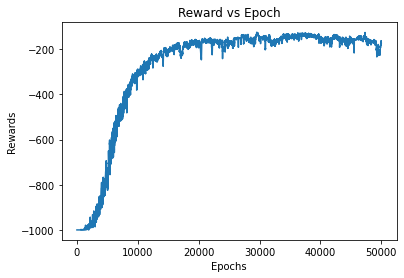

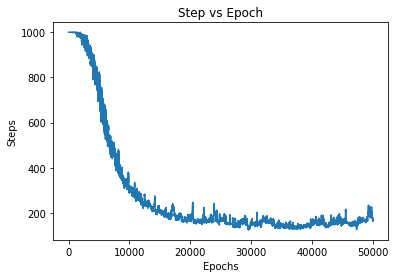

In [8]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gym import wrappers

# Converting continous state problem to discrete values
#position space with 12 buckets and velocity space with 20 buckets
pos_space = np.linspace(-1.2, 0.6, 12)
vel_space = np.linspace(-0.07, 0.07, 20)

#inverse operation so a function that takes an obs & returns a state so
# the obs is a list whose elements are position and velocity & get bins
# using digitize() takes position and position space as input
def get_pos_vel(obsv):
    pos, vel =  obsv
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))
    return (pos_bin, vel_bin)


#creating the get action function since we are dealing with dictionary
#this is used for both epsilon greedy selection and for updating the estimate for q table
def get_action(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)
    return action

if __name__ == '__main__':
    env = gym.make('MountainCar-v0')
    env._max_episode_steps = 1000
    epoch = 50000 #1000 #50000 #25000 
    alpha = 0.01 #0.001 #0.1
    gamma = 0.99
    eps = 1.0 #gradually decreases over time to a finite value

    action_space = [0, 1, 2] 
    # 0-Accelerate to the Left, 1- Don't accelerate, 2-Accelerate to the Right

    states = []
    for pos in range(21):
        for vel in range(21):
            states.append((pos, vel))

    Q = {}
    for state in states:
        for action in action_space:
            Q[state, action] = 0

    score = 0
    steps = []
    total_rewards = np.zeros(epoch)
    for i in range(epoch):
        done = False
        obs = env.reset()
        state = get_pos_vel(obs)
        if i % 100 == 0 and i > 0:
            print('epoch ', i, 'score ', score, 'epsilon %.3f' % eps)
        score = 0
        step_count = 0
        while not done:
            action = np.random.choice([0,1,2]) if np.random.random() < eps \
                    else get_action(Q, state)
            obs_, reward, done, info = env.step(action)
            state_ = get_pos_vel(obs_)
            score += reward
            #env.render()
            action_ = get_action(Q, state_)
            Q[state, action] = Q[state, action] + \
                    alpha*(reward + gamma*Q[state_, action_] - Q[state, action]) # Q-learning equation
            state = state_
            step_count += 1
        steps.append(step_count)
        total_rewards[i] = score
        eps = eps - 2/epoch if eps > 0.01 else 0.01

    mean_rewards = np.zeros(epoch)
    mean_steps = np.zeros(epoch)
    for t in range(epoch):
        mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
        mean_steps[t] = np.mean(steps[max(0, t - 50):t + 1])
        
    plt.figure(1)    
    plt.plot(mean_rewards)
    plt.title('Reward vs Epoch')
    plt.xlabel('Epochs') 
    plt.ylabel('Rewards') 
    plt.savefig('mountaincar_50000.png')
    plt.figure(2)
    plt.plot(mean_steps)
    plt.title('Step vs Epoch')
    plt.xlabel('Epochs') 
    plt.ylabel('Steps') 
    plt.savefig('mountaincar_step.png')
    print("Best score is:",max(total_rewards))


#### Various plots for different alpha and number of epochs

alpha-0.1 and epoch-50000
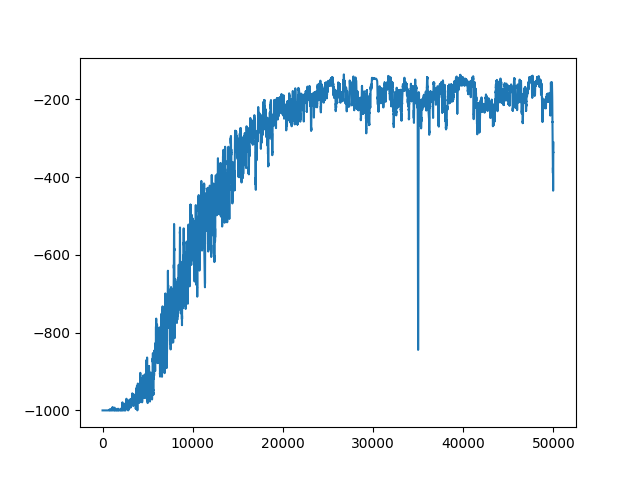

alpha-0.1 and epoch-25000
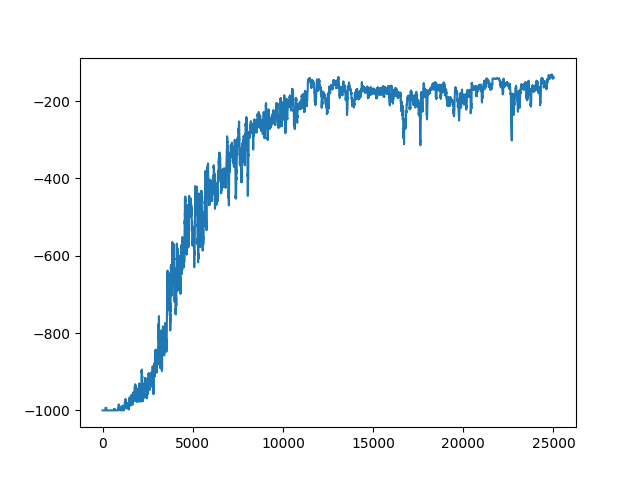

alpha-0.1 and epoch-1000
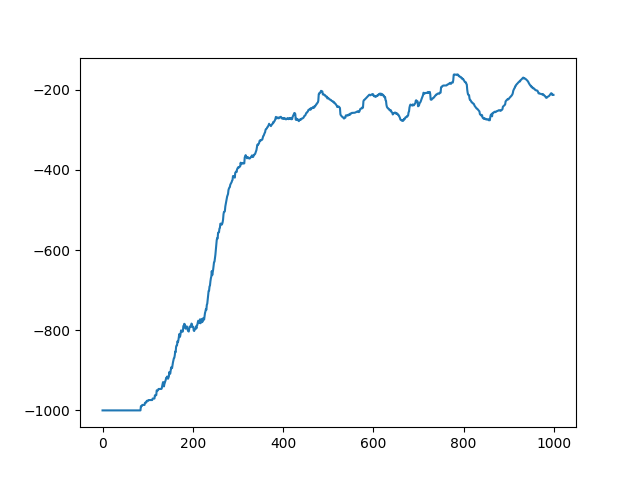

alpha-0.001 and epoch-50000
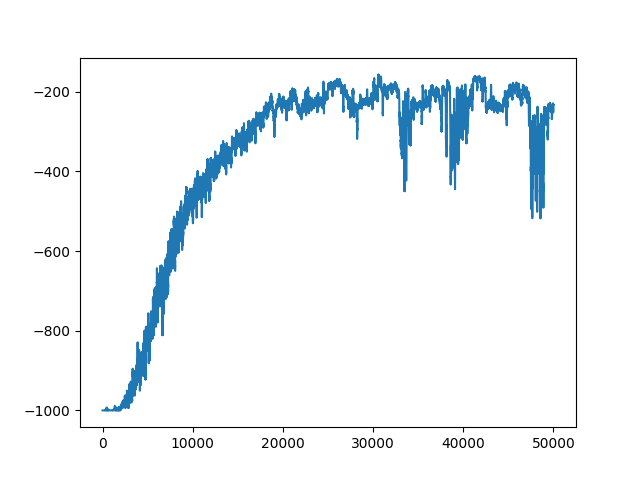

alpha-0.01 and epoch-200000
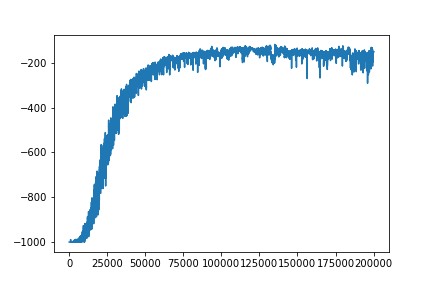

When alpha(learning rate) = 0.01, we observed a smooth learning curve.

#### Experimenting with different reward function

episode  100 score  -5391.0 epsilon 0.992
episode  200 score  -5433.0 epsilon 0.984
episode  300 score  -5811.0 epsilon 0.976
episode  400 score  -5454.0 epsilon 0.968
episode  500 score  -5622.0 epsilon 0.960
episode  600 score  -5538.0 epsilon 0.952
episode  700 score  -5790.0 epsilon 0.944
episode  800 score  -5517.0 epsilon 0.936
episode  900 score  -5517.0 epsilon 0.928
episode  1000 score  -5601.0 epsilon 0.920
episode  1100 score  -5307.0 epsilon 0.912
episode  1200 score  -5685.0 epsilon 0.904
episode  1300 score  -5727.0 epsilon 0.896
episode  1400 score  -5454.0 epsilon 0.888
episode  1500 score  -5580.0 epsilon 0.880
episode  1600 score  -5664.0 epsilon 0.872
episode  1700 score  -5307.0 epsilon 0.864
episode  1800 score  -5412.0 epsilon 0.856
episode  1900 score  -5202.0 epsilon 0.848
episode  2000 score  -5412.0 epsilon 0.840
episode  2100 score  -5370.0 epsilon 0.832
episode  2200 score  -5118.0 epsilon 0.824
episode  2300 score  -5223.0 epsilon 0.816
episode  2400 score 

episode  19300 score  8409.0 epsilon 0.010
episode  19400 score  7592.0 epsilon 0.010
episode  19500 score  -2822.0 epsilon 0.010
episode  19600 score  7354.0 epsilon 0.010
episode  19700 score  7597.0 epsilon 0.010
episode  19800 score  7867.0 epsilon 0.010
episode  19900 score  8414.0 epsilon 0.010
episode  20000 score  7810.0 epsilon 0.010
episode  20100 score  7727.0 epsilon 0.010
episode  20200 score  7557.0 epsilon 0.010
episode  20300 score  7509.0 epsilon 0.010
episode  20400 score  7919.0 epsilon 0.010
episode  20500 score  7883.0 epsilon 0.010
episode  20600 score  7821.0 epsilon 0.010
episode  20700 score  7813.0 epsilon 0.010
episode  20800 score  7975.0 epsilon 0.010
episode  20900 score  8661.0 epsilon 0.010
episode  21000 score  8352.0 epsilon 0.010
episode  21100 score  8373.0 epsilon 0.010
episode  21200 score  7504.0 epsilon 0.010
episode  21300 score  8509.0 epsilon 0.010
episode  21400 score  8300.0 epsilon 0.010
episode  21500 score  8661.0 epsilon 0.010
episode  2

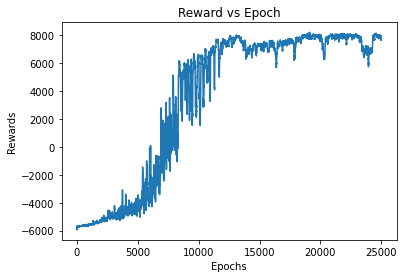

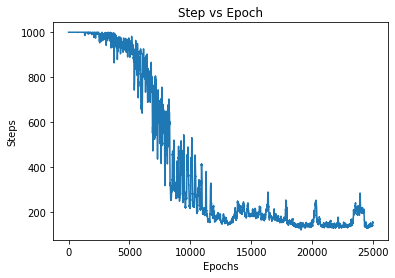

In [9]:
import gym
import matplotlib.pyplot as plt
import numpy as np
from gym import wrappers
import pickle

#position space with 12 buckets and velocity space with 20 buckets
pos_space = np.linspace(-1.2, 0.6, 12)
vel_space = np.linspace(-0.07, 0.07, 20)

#inverse operation so a function that takes an obs & returns a state so
# the obs is a list whose elements are position and velocity & get bins
# using digitize() takes position and position space as input
def get_pos_vel(obsv):
    pos, vel =  obsv
    pos_bin = int(np.digitize(pos, pos_space))
    vel_bin = int(np.digitize(vel, vel_space))

    return (pos_bin, vel_bin)


#creating the max action function since we are dealing with dictionary
#this is used for both epsilon greedy selection and for updating the estimate for q table
def get_action(Q, state, actions=[0, 1, 2]):
    values = np.array([Q[state,a] for a in actions])
    action = np.argmax(values)

    return action

def get_reward(obsv,state,r):
    if obsv[1] > state[1] >= 0 and obsv[1] >= 0:
        r = 20
    if observation[1] < state[1] <= 0 and observation[1] <= 0:
        r = 20
    if done and episode_step < num_episode_steps - 1:
        r += 10000
    else:
        r -= 25
    return r
    
if __name__ == '__main__':
    env = gym.make('MountainCar-v0')
    env._max_episode_steps = 1000
    epochs = 25000#1000 #1000 #50000 #25000 
    alpha = 0.1 #0.001 #0.1
    gamma = 0.99
    eps = 1.0

    action_space = [0, 1, 2]

    states = []
    steps = []
    for pos in range(21):
        for vel in range(21):
            states.append((pos, vel))

    Q = {}
    for state in states:
        for action in action_space:
            Q[state, action] = 0

    score = 0
    total_rewards = np.zeros(epochs)
    for i in range(epochs):
        done = False
        obs = env.reset()
        state = get_pos_vel(obs)
        if i % 100 == 0 and i > 0:
            print('episode ', i, 'score ', score, 'epsilon %.3f' % eps)
        score = 0
        step_count = 0
        while not done:
            action = np.random.choice([0,1,2]) if np.random.random() < eps \
                    else get_action(Q, state)
            obs_, reward, done, info = env.step(action)
            if obs_[1] > obs[1] >= 0 and obs_[1] >= 0:
                reward = 20
            if obs_[1] < obs[1] <= 0 and obs_[1] <= 0:
                reward = 20
            if done :
                reward += 10000
            else:
                reward -= 25
            
            state_ = get_pos_vel(obs_)
            obs=obs_
            score += reward
            #env.render()
            action_ = get_action(Q, state_)
            Q[state, action] = Q[state, action] + \
                    alpha*(reward + gamma*Q[state_, action_] - Q[state, action])
            state = state_
            step_count += 1
        total_rewards[i] = score
        steps.append(step_count)
        eps = eps - 2/epochs if eps > 0.01 else 0.01

    mean_rewards = np.zeros(epochs)
    mean_steps = np.zeros(epochs)
    for t in range(epochs):
        mean_rewards[t] = np.mean(total_rewards[max(0, t-50):(t+1)])
        mean_steps[t] = np.mean(steps[max(0, t - 50):t + 1])
    plt.figure(1) 
    plt.plot(mean_rewards)
    plt.title('Reward vs Epoch')
    plt.xlabel('Epochs') 
    plt.ylabel('Rewards') 
    plt.savefig('mountaincar_rewardfunct.png')
    plt.figure(2) 
    plt.plot(mean_steps)
    plt.title('Step vs Epoch')
    plt.xlabel('Epochs') 
    plt.ylabel('Steps') 
    plt.savefig('mountaincar_step.png')
    plt.savefig('mountaincar_step_rf.png')
    print("Best score is:",max(total_rewards))

Depending on the reward function the score changes and increases towards the goal.

In [4]:
max(mean_rewards)

8112.568627450981